In [106]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
punched_u = np.load('punched_u.npy')
original_u = np.load('original_u.npy')
restored_u = np.load('reconstructed_u.npy')
dx = 0.05
dy = 0.02
dz = 0.01 # these values need to be copied from TestingDifferentAspectRatios.ipynb
X = np.arange(-1, 1.001, dx) #Going above the max value to ensure the max value is included.
Y = np.arange(-1, 1.001, dy)
Z = np.arange(-1, 1.001, dz) #Min and Max values of X, Y, Z need to be copied 
#from TestingDifferentAspectRatios.ipynb
XGrid, YGrid = np.meshgrid(X, Y)

restored_u = restored_u.reshape((len(Z), len(Y), len(X)))
restored_u = np.transpose(restored_u, (0, 2, 1))
original_u = original_u.reshape((len(Z), len(Y), len(X)))
original_u = np.transpose(original_u, (0, 2, 1))
punched_u = punched_u.reshape((len(Z), len(Y), len(X)))
punched_u = np.transpose(punched_u, (0, 2, 1))
print(restored_u.shape)

(201, 41, 101)


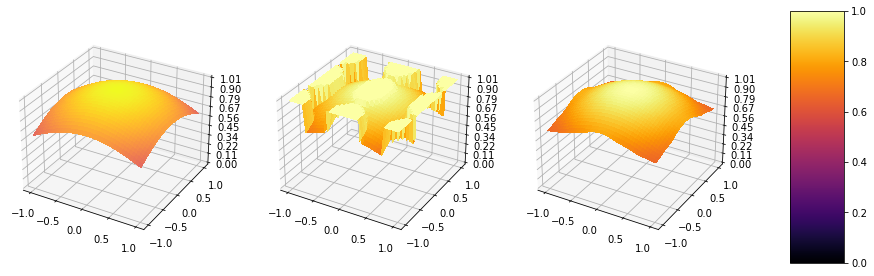

In [109]:
idx = 100
fig, ax = plt.subplots(1,3, figsize=(15,5), subplot_kw={"projection": "3d"})
surf = ax[0].plot_surface(XGrid, YGrid, original_u[idx,:,:].T, cmap=cm.inferno,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
# Customize the z axis.
ax[0].set_zlim(0, 1.01)
ax[0].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[0].zaxis.set_major_formatter('{x:.02f}')

surf1 = ax[1].plot_surface(XGrid, YGrid, punched_u[idx,:,:].T, cmap=cm.inferno,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
# Customize the z axis.
ax[1].set_zlim(0, 1.01)
ax[1].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[1].zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
surf2 = ax[2].plot_surface(XGrid, YGrid, restored_u[idx,:,:].T, cmap=cm.inferno,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
#fig.colorbar(surf1, shrink=0.5, aspect=5)
ax[2].set_zlim(0, 1.01)
ax[2].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[2].zaxis.set_major_formatter('{x:.02f}')

#fig.colorbar(surf2, shrink=0.5, aspect=5)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(surf2, cax=cbar_ax)

plt.show()

In [58]:
print(np.linalg.norm(restored_u[:,:,10] - original_u[:,:,10]))

0.7578599845452397


In [87]:
a = np.load('a.npy')
a = a.reshape((5,3,2))
print(a)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]

 [[25 26]
  [27 28]
  [29 30]]]


In [88]:
y = np.transpose(a, (0, 2, 1))
print(y)

[[[ 1  3  5]
  [ 2  4  6]]

 [[ 7  9 11]
  [ 8 10 12]]

 [[13 15 17]
  [14 16 18]]

 [[19 21 23]
  [20 22 24]]

 [[25 27 29]
  [26 28 30]]]


In [92]:
print(y.shape)

(5, 2, 3)
